# EDA Project

### Perform a service request data analysis of New York City 311 calls dataset to understand the pattern in the data and also visualize the major complaint types.

In [25]:
## Importing all the libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [26]:
# Read the dataset using pandas and converted into dataframe for further analysis
df=pd.read_csv(r"311_Service_Requests_from_2010_to_Present.csv")

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning:

Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.



In [27]:
df.head() # Data representation in dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [28]:
df.tail() # Data representation in dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,CRESCENT AVENUE,EAST 186,NaN,east 186,NaN,NaN,NaN,NaN,NaN,Open,03/29/2015 08:33:41 AM,Your complaint has been forwarded to the New Y...,NaN,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,DEAD END,102 STREET,NaN,NaN,ADDRESS,RICHMOND HILL,NaN,Precinct,Closed,03/29/2015 08:33:28 AM,The Police Department responded and upon arriv...,03/29/2015 02:33:59 AM,09 QUEENS,QUEENS,1026931.0,192185.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,HOPKINS STREET,ELLERY STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,03/29/2015 08:33:03 AM,The Police Department responded to the complai...,03/29/2015 03:40:20 AM,03 BROOKLYN,BROOKLYN,999713.0,194161.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,EAST TREMONT AVENUE,CODDINGTON AVENUE,LA SALLE AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,03/29/2015 08:33:02 AM,The Police Department responded to the complai...,03/29/2015 04:38:35 AM,10 BRONX,BRONX,1030021.0,244520.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,WEST 48 STREET,BROADWAY,8 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,03/29/2015 08:33:01 AM,The Police Department responded to the complai...,03/29/2015 04:41:50 AM,05 MANHATTAN,MANHATTAN,988150.0,216378.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [29]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [30]:
df.shape # Size of data in dataset

(300698, 53)

In [31]:
df.info() # Data information in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

### In created date and closed date column, date string formats are different thats why I have not used format (%m:%d:%Y %H:%M:%S %d)

In [32]:
df['Created Date'] = df['Created Date'].astype('datetime64[ns]') # Object datatype of column is converted into datetime format

In [33]:
df['Closed Date'] = df['Closed Date'].astype('datetime64[ns]') # Object datatype of column is converted into datetime format

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [35]:
df.isnull().sum() # Check the null value count

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [36]:
# Delete the columns, having all null values 

del df["School or Citywide Complaint"]
del df["Vehicle Type"]
del df["Taxi Company Borough"]
del df["Taxi Pick Up Location"]
#del df["Bridge Highway Name"]               
#del df["Bridge Highway Direction"]          
#del df["Road Ramp"]                         
#del df["Bridge Highway Segment"]
del df["Garage Lot Name"]
#del df["Ferry Direction"]
#del df["Ferry Terminal Name"]

In [37]:
df.shape # Size of dataset after deletion

(300698, 48)

In [38]:
# Duplicates values
df.duplicated().sum() # Check if there are some duplicate data availabel 

0

In [39]:
df["Request_Closing_Time"]=df["Closed Date"]-df["Created Date"] 
# New column Request_Closing_Time is created in dataset which having total days and time required to close the request

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

In [41]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [42]:
cf.set_config_file(theme='henanigans')
df["Complaint Type"].value_counts().iplot(kind = 'bar')

<AxesSubplot:ylabel='Complaint Type'>

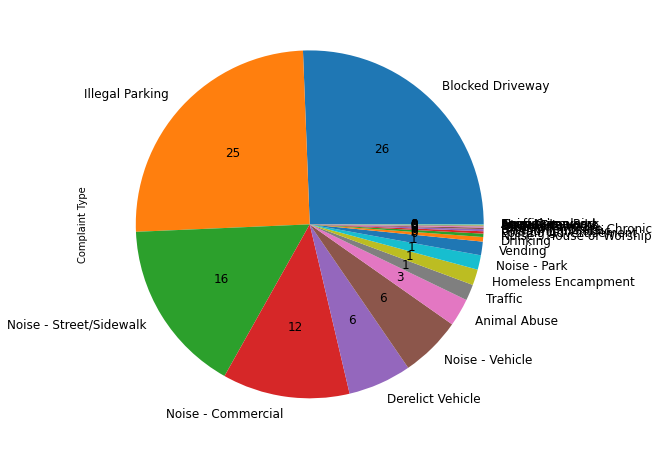

In [43]:
df["Complaint Type"].value_counts().plot.pie(figsize=(12,8),fontsize = 12, autopct = '%.f')

In total complaints, 
   1. Around 26% of complaints (count=77044) are of Blocked Driveway type
   2. Around 25% of complaints (count=75361) are of Illegal Parking type
   3. Around 28% of complaints are of Noise in stree/sidewalk and commercial    

<AxesSubplot:xlabel='Incident Zip', ylabel='count'>

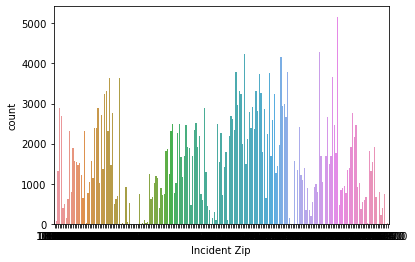

In [44]:
x=df["Incident Zip"].head()
sns.countplot(x="Incident Zip", data=df)

In [45]:
max_comp=df.loc[df["Incident Zip"].value_counts()].max().City
print(f"Maximum complaints are filed from {max_comp} city")

min_comp=df.loc[df["Incident Zip"].value_counts()].min().City
print(f"Maximum complaints are filed from {min_comp} city")

#max_complaint_city=max_complaint.City
#max_complaint_city

Maximum complaints are filed from WOODSIDE city
Maximum complaints are filed from ASTORIA city


<ipython-input-45-71ad1302f188>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-45-71ad1302f188>:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [46]:
df["Incident Zip"].value_counts().head(100).iplot(kind = 'bar')

In [47]:
df.loc[df["Complaint Type"].value_counts()].sort_values(by="Incident Zip",ascending=False)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
17083,32193428,2015-12-13 14:54:32,2015-12-13 17:37:53,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11432.0,88-40 173 STREET,173 STREET,WARWICK CRESCENT,89 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Closed,12/13/2015 10:54:32 PM,The Police Department issued a summons in resp...,12/13/2015 05:37:53 PM,12 QUEENS,QUEENS,1042908.0,198161.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.710388,-73.788420,"(40.71038848012968, -73.7884195627267)",0 days 02:43:21
307,32310128,2015-12-31 16:59:34,2015-12-31 21:14:28,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11416.0,102-04 89 STREET,89 STREET,102 AVENUE,102 ROAD,NaN,NaN,ADDRESS,OZONE PARK,NaN,Precinct,Closed,01-01-16 0:59,The Police Department responded to the complai...,12/31/2015 09:14:28 PM,09 QUEENS,QUEENS,1025651.0,187768.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.681960,-73.850730,"(40.681959730121285, -73.8507296005036)",0 days 04:14:54
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02
4416,32275538,2015-12-26 22:32:03,2015-12-27 01:26:32,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11369.0,27-20 BUTLER STREET,BUTLER STREET,27 AVENUE,29 AVENUE,NaN,NaN,ADDRESS,EAST ELMHURST,NaN,Precinct,Closed,12/27/2015 06:32:03 AM,The Police Department responded and upon arriv...,12/27/2015 01:26:32 AM,03 QUEENS,QUEENS,1021750.0,218028.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.765033,-73.864626,"(40.765033381781414, -73.86462593974795)",0 days 02:54:29
427,32308832,2015-12-31 14:02:22,2015-12-31 19:08:09,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11366.0,NaN,NaN,NaN,NaN,196 STREET,UNION TURNPIKE,INTERSECTION,FRESH MEADOWS,NaN,Precinct,Closed,12/31/2015 10:02:22 PM,The Police Department responded to the complai...,12/31/2015 07:08:09 PM,08 QUEENS,QUEENS,1046633.0,205648.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.730913,-73.774914,"(40.73091294245788, -73.77491408700904)",0 days 05:05:47
4042,32279186,2015-12-27 06:11:40,2015-12-27 07:42:50,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11355.0,59-40 157 STREET,157 STREET,59 AVENUE,LONG ISLAND EXPRESSWAY,NaN,NaN,ADDRESS,FLUSHING,NaN,Precinct,Closed,12/27/

In [48]:
df.loc[df["Incident Zip"].value_counts()].sort_values(by="Incident Zip",ascending=False)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
2268,32292249,2015-12-29 11:43:12,2015-12-29 12:39:15,NYPD,New York City Police Department,Animal Abuse,Tortured,Residential Building/House,11694.0,320 BEACH 100 STREET,BEACH 100 STREET,ROCKAWAY FREEWAY,BEACH CHANNEL DRIVE,NaN,NaN,ADDRESS,ROCKAWAY PARK,NaN,Precinct,Closed,12/29/2015 07:43:12 PM,The Police Department responded to the complai...,12/29/2015 12:39:15 PM,14 QUEENS,QUEENS,1033664.0,152620.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.585445,-73.822096,"(40.58544503178869, -73.82209634713989)",0 days 00:56:03
551,32305075,2015-12-31 11:17:32,2015-12-31 22:56:36,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11436.0,128-04 143 STREET,143 STREET,SUTTER AVENUE,129 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Closed,12/31/2015 07:17:32 PM,The Police Department responded to the complai...,12/31/2015 10:56:36 PM,12 QUEENS,QUEENS,1040901.0,184253.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.672227,-73.795776,"(40.67222741049004, -73.79577577805641)",0 days 11:39:04
551,32305075,2015-12-31 11:17:32,2015-12-31 22:56:36,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11436.0,128-04 143 STREET,143 STREET,SUTTER AVENUE,129 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Closed,12/31/2015 07:17:32 PM,The Police Department responded to the complai...,12/31/2015 10:56:36 PM,12 QUEENS,QUEENS,1040901.0,184253.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.672227,-73.795776,"(40.67222741049004, -73.79577577805641)",0 days 11:39:04
622,32310196,2015-12-31 09:42:44,2015-12-31 09:52:23,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11435.0,144-20 109 AVENUE,109 AVENUE,PINEGROVE STREET,INWOOD STREET,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Closed,12/31/2015 05:42:44 PM,The Police Department responded to the complai...,12/31/2015 09:52:23 AM,12 QUEENS,QUEENS,1038994.0,190325.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.688906,-73.802601,"(40.688905627671424, -73.80260107370238)",0 days 00:09:39
1196,32304765,2015-12-30 16:38:29,2015-12-30 22:21:46,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11435.0,89-20 146 STREET,146 STREET,89 AVENUE,JAMAICA AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Closed,12/31/2015 12:38:29 AM,The Police Department responded to the complai...,12/30/2015 10:21:46 PM,12 QUEENS,QUEENS,1037079.0,195477.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.703058,-73.809466,"(40.70305827521831, -73.80946585600235)",0 days 05:43:17
1690,32297062,2015-12-30 01:14:33,2015-12-30 04:09:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11435.0,148-10 85 AVENUE,85 AVENUE,148 STREET,150 S

In the dataset,
1. Maximum complains i.e. total 51670 are from the WOODSIDE city, zip code:11385
2. Minimum complains are from the ASTORIA city, zip code:11241

In [54]:
print(df.Status.value_counts())
df.Status.value_counts().iplot(kind = 'bar')

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64


In [74]:
close_case=df.Status.value_counts().Closed
Total_percentage=close_case/len(df)*100
print(f"Total percentage of closed cases are: {Total_percentage:.2f}")

open_case=df.Status.value_counts().Open
Total_percentage=open_case/len(df)*100
print(f"Total percentage of open cases are: {Total_percentage:.2f}")

assign_case=df.Status.value_counts().Assigned
Total_percentage=assign_case/len(df)*100
print(f"Total percentage of open cases are: {Total_percentage:.2f}")



Total percentage of closed cases are: 99.26
Total percentage of open cases are: 0.48
Total percentage of open cases are: 0.26
